<a href="https://colab.research.google.com/github/crestrepoz/Master-s-Degree-in-Data-Science/blob/main/2_script_m1u1_accion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Programa Ejemplo para Realizar Aprendizaje Supervisado

## Etapa 1: Entendimiento de los datos
Antes de comenzar incluso a preprocesar los datos, debemos conocer las características del conjunto de datos que tenemos.

Como mínimo debemos saber:
-  Cuántos registros hay?
-  Cuantos atributos tiene cada registro?
-  De qué tipo son los atributos?

Además:
-  Obtener una medida de centralidad para cada atributo
-  Obtener una medida de dispersión o desviación para los atributos que ésto tenga sentido
-  Calcular la matriz de correlación de los atributos de entrada para identificar atributos redundantes

Como paso previo al preprocesamiento de los datos, debemos:
-  Detectar si hay datos faltantes (determinar en qué columnas y cuantos datos faltan en un mismo registro)
-  Detectar si hay datos atípicos
-  Detectar si hay desbalance entre clases

Notar que en esta etapa no hacemos ninguna modificación sobre los datos, sólo estamos conociéndolos a fondo para saber con qué material contamos para trabajar.


In [ ]:
# Carga de librerías y lectura del archivo que contiene los datos

import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt

url="https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
data = pd.read_csv(
    url,
    header=None,
    na_values=['?'],
    skipinitialspace=True   # <- quita espacios después de las comas
)
# Se etiquetan las columnas para poder interpretar más fácilmente los datos.
# Cada fila es un ejemplo, cada columna un atributo.
# La columna llamada C es el atributo a predecir
data.columns = ['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education-num', 'Marital-status', 'Occupation',
              'Relationship', 'Race', 'Sex', 'Capital-gain', 'Capital-loss', 'Hpw', 'Country', 'C']
data.head()

,Age,Workclass,Fnlwgt,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hpw,Country,C
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
#Cuál es el número de registros?
#Cuál es el número de atributos?

shape = data.shape
shape

(32561, 15)

In [ ]:
#Cual es el tipo de los atributos?
data.dtypes

,0
Age,int64
Workclass,object
Fnlwgt,int64
Education,object
Education-num,int64
Marital-status,object
Occupation,object
Relationship,object
Race,object
Sex,object


In [ ]:
#Medida de centralidad y desviación para atributos numéricos:
data.describe()

,Age,Fnlwgt,Education-num,Capital-gain,Capital-loss,Hpw
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


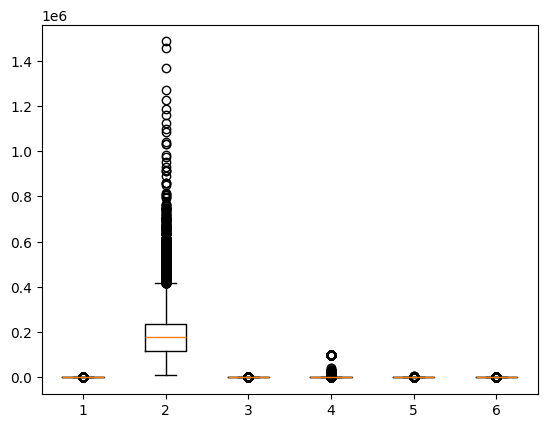

In [ ]:
# Diagrama de cajas y bigotes para atributos numéricos
# Permite identificar la existencia de datos atípicos

plt.boxplot((data['Age'],data['Fnlwgt'],data['Education-num'],data['Capital-gain'],data['Capital-loss'], data['Hpw']))
plt.show()

In [ ]:
#Medida de centralidad para atributos categóricos:
data.mode()

,Age,Workclass,Fnlwgt,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hpw,Country,C
0,36.0,Private,123011,HS-grad,9.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,40.0,United-States,<=50K
1,NaN,NaN,164190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,203488,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Calcular matriz de correlaciones (redondeada a 2 decimales)
correlaciones = data.corr().round(2)

# Mostrar en consola
print(correlaciones.to_string())

##Únicamentre corrió cuando se ejecutó la parte del código que convirtió los atributos categóricos a valores numéricos

                 Age  Workclass  Fnlwgt  Education  Education-num  Marital-status  Occupation  Relationship  Race   Sex  Capital-gain  Capital-loss   Hpw  Country     C
Age             1.00       0.04   -0.08      -0.01           0.04           -0.27        0.00         -0.26  0.03  0.09          0.08          0.06  0.07    -0.00  0.23
Workclass       0.04       1.00   -0.02       0.00           0.00           -0.02        0.01         -0.06  0.05  0.07          0.03          0.00  0.04    -0.00  0.00
Fnlwgt         -0.08      -0.02    1.00      -0.03          -0.04            0.03        0.00          0.01 -0.02  0.03          0.00         -0.01 -0.02    -0.06 -0.01
Education      -0.01       0.00   -0.03       1.00           0.36           -0.04       -0.04         -0.01  0.01 -0.03          0.03          0.02  0.06     0.08  0.08
Education-num   0.04       0.00   -0.04       0.36           1.00           -0.07        0.07         -0.09  0.03  0.01          0.12          0.08  0.15  

In [ ]:
# Cual es el máximo de datos faltantes en un mismo registro?
# Si hay registros a los que les faltan muchos valores, es mejor eliminarlos.
max(data.isnull().sum(axis=1))

3

In [ ]:
#Cuantos datos faltantes hay por cada atributo?
data.isnull().sum()

,0
Age,0
Workclass,1836
Fnlwgt,0
Education,0
Education-num,0
Marital-status,0
Occupation,1843
Relationship,0
Race,0
Sex,0


In [ ]:
#Cuantos registros hay por cada clase? es decir, por cada valor del atributo de salida?

print(data['C'].value_counts())

C
<=50K    24720
>50K      7841
Name: count, dtype: int64


## Etapa 2: Preparación de los datos
De acuerdo a lo observado en la etapa 1, se define una secuencia de actividades que modifican los datos para eliminar las situaciones que puedan ser causa de fallo o deficiencia en el proceso de aprendizaje. En este caso se van a realizar las siguientes actividades:


1.   Completar los datos faltantes utilizando la media para atributos numéricos y la moda para atributos categóricos.
2.   Convertir los atributos categóricos a escala numérica.
3.   Normalizar los valores de algunos los atributos.
4.   Balancear las clases eliminando registros de la clase mayoritaria.






In [ ]:
# Se reemplazan los datos faltantes (NaN) por la moda de cada atributo.
data["Workclass"].fillna("Private", inplace = True)
data["Occupation"].fillna("Prof-specialty", inplace = True)
data["Country"].fillna("United-States", inplace = True)
data.head()

/tmp/ipython-input-879742698.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Workclass"].fillna("Private", inplace = True)
/tmp/ipython-input-879742698.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

,Age,Workclass,Fnlwgt,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hpw,Country,C
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Se convierten los atributos categóricos a valores numéricos
labelencoder= LabelEncoder()
data['Country'] = labelencoder.fit_transform(data['Country'])
data['Occupation'] = labelencoder.fit_transform(data['Occupation'])
data['Workclass'] = labelencoder.fit_transform(data['Workclass'])
data['Education'] = labelencoder.fit_transform(data['Education'])
data['Marital-status'] = labelencoder.fit_transform(data['Marital-status'])
data['Relationship'] = labelencoder.fit_transform(data['Relationship'])
data['Race'] = labelencoder.fit_transform(data['Race'])
data['Sex'] = labelencoder.fit_transform(data['Sex'])
data['C'] = labelencoder.fit_transform(data['C'])
data.head()

,Age,Workclass,Fnlwgt,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hpw,Country,C
0,39,6,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0


In [ ]:
from sklearn import preprocessing

# Se normalizan los tres atributos seleccionados
data['Fnlwgt'] = preprocessing.scale(data['Fnlwgt'])
data['Capital-gain'] = preprocessing.scale(data['Capital-gain'])
data['Capital-loss'] = preprocessing.scale(data['Capital-loss'])
data.head()

,Age,Workclass,Fnlwgt,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hpw,Country,C
0,39,6,-1.063611,9,13,4,0,1,4,1,0.148453,-0.21666,40,38,0
1,50,5,-1.008707,9,13,2,3,0,4,1,-0.145920,-0.21666,13,38,0
2,38,3,0.245079,11,9,0,5,1,4,1,-0.145920,-0.21666,40,38,0
3,53,3,0.425801,1,7,2,5,0,2,1,-0.145920,-0.21666,40,38,0
4,28,3,1.408176,9,13,2,9,5,2,0,-0.145920,-0.21666,40,4,0


In [ ]:
# Se hace balanceo de clases eliminando ejemplos de la clase mayoritaria
g = data.groupby('C')
dataBal = pd.DataFrame(g.apply(lambda x: x.sample(g.size().min()).reset_index(drop=True)))
dataBal

/tmp/ipython-input-2647621983.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  dataBal = pd.DataFrame(g.apply(lambda x: x.sample(g.size().min()).reset_index(drop=True)))


Age  Workclass    Fnlwgt  Education  Education-num  Marital-status  \
C                                                                            
0 0      29          3 -0.363780          8             11               0   
  1      61          3  0.485414          5              4               6   
  2      55          3  0.088004          1              7               2   
  3      30          3 -0.155648          8             11               3   
  4      52          5 -0.259572         11              9               0   
...     ...        ...       ...        ...            ...             ...   
1 7836   43          3 -0.066523         11              9               2   
  7837   58          4 -0.719787          9             13               2   
  7838   48          3  1.568396          9             13               2   
  7839   42          3  0.227788         11              9               2   
  7840   36          3  2.103478          9             13               4   

        Occupation  Relationship  Race  Sex  Capital-gain  Capital-loss  Hpw  \
C                                                                              
0 0              5             4     4    1     -0.145920     -0.216660   50   
  1              4             1     2    1     -0.145920     -0.216660   40   
  2              6             0     4    1     -0.145920     -0.216660   32   
  3              0             1     4    0     -0.145920     -0.216660   40   
  4             11             1     4    1     -0.145920     -0.216660   40   
...            ...           ...   ...  ...           ...           ...  ...   
1 7836           2             0     4    1     -0.145920     -0.216660   40   
  7837           3             0     4    1      0.895083     -0.216660   30   
  7838           9             0     4    1     -0.145920     -0.216660   45   
  7839           2             0     4    1     -0.145920      4.466257   40   
  7840           9             3     4    0     -0.145920     -0.216660   35   

        Country  C  
C                   
0 0          38  0  
  1          38  0  
  2          38  0  
  3          38  0  
  4          38  0  
...         ... ..  
1 7836       38  1  
  7837       38  1  
  7838        1  1  
  7839       38  1  
  7840       38  1  

[15682 rows x 15 columns]

In [ ]:
# Se verifica que haya quedado el mismo número de registros por cada clase
print(dataBal['C'].value_counts())

C
0    7841
1    7841
Name: count, dtype: int64


La base de datos está representada a partir de filas y columnas.
/Las filas corresponden a los ejemplos y las columnas a los atributos.
En este primer momento debemos eliminar uno de los atributos (elegir cual).

De acuerdo con lo revisado en nuestra base de datos, y luego de correr el proceso de correlación en nuestras varaibles, se decide retirar la variable Education-num, considerando que presenta una correlación de 0.36 con la variable Education, de acuerdo con lo revisado en la literaruta asociado a la correlación de Pearson, se evidencia que una correlación con valores cercanos a 1 o -1, es una fuerte correlación; en cambio, una correlación cercana a 0 indica poca o ninguna relación lineal; sin embargo,en nuestra base de datos se intuye que Education-num tienen una asociación directa con la variable Education.

## Etapa 3: Modelado
En esta etapa se van a utilizar los datos para realizar aprendizaje del atributo C a partir de los valores de los demás atributos. Es decir, se va a predecir si una persona tiene ingresos superiores o inferiores a 50K dolares. Las actividades a realizar son:
1.   Dividir el conjunto de datos en conjuntos de entrenamiento y test.
2.   Realizar el entrenamiento del modelo de regresión logística utilizando para ello el conjunto de entrenamiento.
3.   Aplicar el modelo construido a los datos del conjunto de test.
4.   Cálculo de una métrica de desempeño para evaluar la calidad del modelo en sus prediciones sobre el conjunto de test.

In [ ]:
# Dividir el conjunto de datos en conjuntos de entrenamiento y test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dataBal.drop('C', axis=1), dataBal.C, test_size=0.30)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(10977, 14) (10977,)
(4705, 14) (4705,)


In [ ]:
# Entrenamiento del modelo de clasificación por regresión logística
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

logisticRegr = LogisticRegression(solver="lbfgs", max_iter=500, tol=0.01)
logisticRegr.fit(X_train, y_train)


LogisticRegression(max_iter=500, tol=0.01)

In [ ]:
# Aplicación del modelo construido a los datos de test
predictions = logisticRegr.predict(X_test)
predictions

array([1, 1, 0, ..., 0, 1, 1])

In [ ]:
# Cálculo del accuracy para evaluar el desempeño del modelo sobre los datos de test
from sklearn.metrics import accuracy_score

accuracyreg = accuracy_score(y_test, predictions)
print("Accuracy:", round(accuracyreg, 5))

Accuracy: 0.74899


# Fin del programa

To calculate the correlation matrix, we need to select only the numerical columns from the DataFrame.

In [ ]:
# Select only numeric columns for correlation calculation
numeric_data = data.select_dtypes(include=[np.number])

# Calculate the correlation matrix for the numeric columns
correlation_matrix = numeric_data.corr()

# Display the correlation matrix
display(correlation_matrix)

,Age,Workclass,Fnlwgt,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hpw,Country,C
Age,1.000000,0.040504,-0.076646,-0.010508,0.036527,-0.266288,0.001739,-0.263698,0.028718,0.088832,0.077674,0.057775,0.068756,-0.000270,0.234037
Workclass,0.040504,1.000000,-0.024338,0.004874,0.003536,-0.020468,0.007110,-0.057947,0.048350,0.071584,0.031505,0.002644,0.042199,-0.001625,0.002693
Fnlwgt,-0.076646,-0.024338,1.000000,-0.028145,-0.043195,0.028153,0.000188,0.008931,-0.021291,0.026858,0.000432,-0.010252,-0.018768,-0.063286,-0.009463
Education,-0.010508,0.004874,-0.028145,1.000000,0.359153,-0.038407,-0.041279,-0.010876,0.014131,-0.027356,0.030046,0.016746,0.055510,0.076060,0.079317
Education-num,0.036527,0.003536,-0.043195,0.359153,1.000000,-0.069304,0.070954,-0.094153,0.031838,0.012280,0.122630,0.079923,0.148123,0.088894,0.335154
Marital-status,-0.266288,-0.020468,0.028153,-0.038407,-0.069304,1.000000,0.034962,0.185451,-0.068013,-0.129314,-0.043393,-0.034187,-0.190519,-0.021278,-0.199307
Occupation,0.001739,0.007110,0.000188,-0.041279,0.070954,0.034962,1.000000,-0.037451,-0.004839,0.047461,0.018021,0.009680,-0.012879,-0.002217,0.034625
Relationship,-0.263698,-0.057947,0.008931,-0.010876,-0.094153,0.185451,-0.037451,1.000000,-0.116055,-0.582454,-0.057919,-0.061062,-0.248974,-0.010712,-0.250918
Race,0.028718,0.048350,-0.021291,0.014131,0.031838,-0.068013,-0.004839,-0.116055,1.000000,0.087204,0.011145,0.018899,0.041910,0.116529,0.071846
Sex,0.088832,0.071584,0.026858,-0.027356,0.012280,-0.129314,0.047461,-0.582454,0.087204,1.000000,0.048480,0.045567,0.229309,0.002061,0.215980


In [ ]:
#Borrar Variable Education-num
datatree = dataBal.drop(['Education-num'], axis=1)
datatree

Age  Workclass    Fnlwgt  Education  Marital-status  Occupation  \
C                                                                         
0 0      29          3 -0.363780          8               0           5   
  1      61          3  0.485414          5               6           4   
  2      55          3  0.088004          1               2           6   
  3      30          3 -0.155648          8               3           0   
  4      52          5 -0.259572         11               0          11   
...     ...        ...       ...        ...             ...         ...   
1 7836   43          3 -0.066523         11               2           2   
  7837   58          4 -0.719787          9               2           3   
  7838   48          3  1.568396          9               2           9   
  7839   42          3  0.227788         11               2           2   
  7840   36          3  2.103478          9               4           9   

        Relationship  Race  Sex  Capital-gain  Capital-loss  Hpw  Country  C  
C                                                                             
0 0                4     4    1     -0.145920     -0.216660   50       38  0  
  1                1     2    1     -0.145920     -0.216660   40       38  0  
  2                0     4    1     -0.145920     -0.216660   32       38  0  
  3                1     4    0     -0.145920     -0.216660   40       38  0  
  4                1     4    1     -0.145920     -0.216660   40       38  0  
...              ...   ...  ...           ...           ...  ...      ... ..  
1 7836             0     4    1     -0.145920     -0.216660   40       38  1  
  7837             0     4    1      0.895083     -0.216660   30       38  1  
  7838             0     4    1     -0.145920     -0.216660   45        1  1  
  7839             0     4    1     -0.145920      4.466257   40       38  1  
  7840             3     4    0     -0.145920     -0.216660   35       38  1  

[15682 rows x 14 columns]

In [ ]:
#Estructurar el Modelo de Árbol de Decisiones
from sklearn.tree import DecisionTreeClassifier

modeltree = DecisionTreeClassifier(random_state=100)

In [ ]:
#Identificar el manejo de la base de datos, seleccionando la variable objetivo la cual es la "c"

#Base de datos
x_tree = datatree.drop(columns=['C'])

#Variable Objetivo
y_tree = datatree['C']

In [ ]:
#Modificar la proporción entre datos de entrenamiento y prueba para que sea 60% entrenamiento y 40% prueba.
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x_tree, y_tree, test_size=0.40, random_state=100)

In [ ]:
#Realizar el entranamiento con los nuevos datos
modeltree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=100)

In [ ]:
#Realizar Predicción sobre los datos para la prueba
y_pred = modeltree.predict(x_test)
y_pred

array([1, 1, 1, ..., 0, 1, 0])

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


accuracytree = accuracy_score


#Revisar resultado del modelo

print("Accuracy Decision Tree:", round(accuracytree(y_test, y_pred), 5))
print("Classification Report:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))

Accuracy Decision Tree: 0.76678
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.76      0.77      3126
           1       0.77      0.77      0.77      3147

    accuracy                           0.77      6273
   macro avg       0.77      0.77      0.77      6273
weighted avg       0.77      0.77      0.77      6273

Confusion Matrix:
 [[2388  738]
 [ 725 2422]]


In [ ]:
print("Accuracy Decision Tree:", round(accuracytree(y_test, y_pred), 5))
print("Accuracy reg:", round(accuracyreg, 5))

Accuracy Decision Tree: 0.76678
Accuracy reg: 0.74899


#Resulado del Ejericio

La idea era evaluar la base de datos que tenemos y a través de una predicción e Variable Target "atributo C", que indica si una persona tiene ingresos >50K o ≤50K.

Como Modelos aplicados inicialmente tomamos un Modelo de Regresión y en segunda fase para comparación un modelo Árbol de Decisión.

Para la segunda fase se eliminó la variable Education-num, que como se explicó en en el noteboot, está variable tenía una alta explicación con la variable educatión y un 36% de correlación lo cual la hacía de una alguna manera, la correlación mas baja del modelo.

En esta fase, también se modificó la proporción de entrenamiento/prueba dejando como medida que el 60% era entrenamiento y el 40%  era prueba.

La variable que se uso para medir el resultado fue Accuracy (Exactitud) la cual permite medir  el porcentaje de predicciones correctas; y como resultado se tuvo que el Accuracy Decision Tree: 0.76678 es decir el 76.7% de acierto y el Accuracy Regresión: 0.74899 es decir 74.9% de acierto. Como se puede notar, El árbol de decisión supera a la regresión en ~1.8 puntos porcentuales en exactitu, concluyendo que El Árbol de Decisión mostró mejor desempeño que la regresión en esta base de datos analizada, e identificó de manera correcta si alguien gana >50K o ≤50K en el 76.7% de los casos evaluados.